# Best practices for constructing, preparing, and evaluating protein-ligand binding affinity benchmarks

### DavidHahn1*, HannahE.BruceMacdonald2, LauraPerezBenito3, JohnD.Chodera2, AntoniaS.J.S.Mey4, DavidL.Mobley5, GaryTresadern6

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from arsenic import stats

In [8]:
### TOY DATA TO PLOT

y = [-1.61, 0.59, 0.81, -0.17, 2.49, 0.07, -0.44, -0.19, 0.89, 2.00, 1.13, 0.35, -0.37, -0.54, -1.01, 0.12, 1.12, 1.02, 2.20, 1.68, 0.61, 2.74, -0.67, -0.00]
x = [-1.28, 1.79, -0.16, 0.22, 2.36, 0.79, 0.02, -0.42, 0.30, 0.75, 1.32, 1.77, -0.39, -0.78, -0.54, -0.76, -0.04, -0.57, 0.95, -0.49, -2.49, 1.79, 1.44, 1.23]
x_errors = [0.22 for _ in x]
y_errors = [np.random.normal(0.3,0.2) for _ in x]


#### Figure XX Measuring success section


A) correct plot style

B + C) x !=y because of limits (B) and plot shape (C)

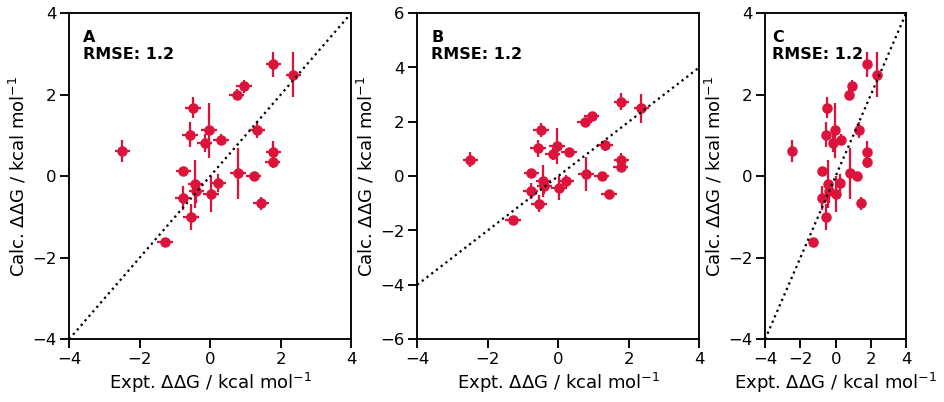

In [9]:
sns.set_context('talk')

f, axes = plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 1, 0.5]},figsize=(15,6))


for i, label in enumerate(('A', 'B', 'C')):
        axes[i].errorbar(x, y, xerr=x_errors,yerr=y_errors,linestyle='none',color='crimson')
        axes[i].scatter(x, y,color='crimson')
        RMSE = stats.bootstrap_statistic(x,y,dy_true=x_errors,dy_pred=y_errors)['mle']
        xlimit = axes[i].get_xlim()
        ylimit = axes[i].get_ylim()
        limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
        axes[i].plot(limit,limit, 'k:')
        axes[i].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
        axes[i].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

        axes[i].set_xlim(limit)
        axes[i].set_ylim(limit)
        
        axes[i].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
        axes[i].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')

        axes[i].text(0.05, 0.95, label+f'\nRMSE: {RMSE:.1f}', transform=axes[i].transAxes,
          fontsize=16, fontweight='bold', va='top')
        
axes[1].set_ylim(-6,6)
axes[1].set_yticks(np.arange(-6,7, 2.0))

plt.subplots_adjust(wspace=0.28)
plt.savefig('plotting-basics.png')
plt.show()


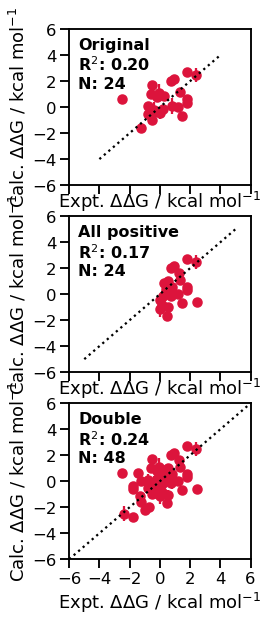

In [10]:
sns.set_context('talk')


results = {}

# original
results['Original'] = {'x':x, 'y':y,'xerr':x_errors,'yerr':y_errors}

pos_X = []
pos_Y = []
for i,j in zip(x,y):
    if i < 0:
        pos_X.append(-i)
        pos_Y.append(-j)
    else:
        pos_X.append(i)
        pos_Y.append(j)        

results['All positive'] = {'x':pos_X, 'y':pos_Y,'xerr':x_errors,'yerr':y_errors}


double_X = []
double_Y = []
double_Xerr = []
double_Yerr = []
for i,j,erri,errj in zip(x,y,x_errors, y_errors):
    double_X.append(-i)
    double_Y.append(-j)
    double_X.append(i)
    double_Y.append(j)    
    double_Xerr.append(erri)
    double_Yerr.append(errj)
    double_Xerr.append(erri)
    double_Yerr.append(errj)        

results['Double'] = {'x':double_X, 'y':double_Y,'xerr':double_Xerr,'yerr':double_Yerr}


f, axes = plt.subplots(len(results),1,figsize=(3.25,3.25*len(results)), sharex=True,sharey=True)

for i, (label, results) in enumerate(results.items()):
        axes[i].errorbar(results['x'], results['y'], xerr=results['xerr'],yerr=results['yerr'],linestyle='none',color='crimson')
        axes[i].scatter(results['x'], results['y'],color='crimson')
        R2 = stats.bootstrap_statistic(results['x'], results['y'],dy_true=results['xerr'],dy_pred=results['yerr'],statistic='R2')['mle']
        xlimit = axes[i].get_xlim()
        ylimit = axes[i].get_ylim()
        limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
        axes[i].plot(limit,limit, 'k:')
        axes[i].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
        axes[i].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

        axes[i].set_xlim(limit)
        axes[i].set_ylim(limit)
        
        axes[i].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
        axes[i].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')

        axes[i].text(0.05, 0.95, label+f'\nR$^2$: {R2:.2f}\nN: {len(results["x"])}', transform=axes[i].transAxes,
          fontsize=16, fontweight='bold', va='top')


plt.subplots_adjust(wspace=0.28)
plt.savefig('plotting-basics.png')
plt.show()